<a href="https://colab.research.google.com/github/sritharun242004/HackeOverFlow/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving kaggle.json to kaggle.json
Uploaded file: kaggle.json


In [5]:
import shutil

# Move kaggle.json to the correct directory
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")


'/root/.kaggle/kaggle.json'

In [9]:
import os
# Set correct permissions
os.chmod("/root/.kaggle/kaggle.json", 0o600)

In [12]:
!kaggle datasets download -d ameyamote030/einterface-image-dataset

 98% 785M/801M [00:12<00:00, 68.8MB/s]
100% 801M/801M [00:12<00:00, 66.9MB/s]


In [13]:
!unzip /content/einterface-image-dataset.zip -d /content/einterface-image-dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_Image/train/Sadness/myvideo_frames1255_jpg.rf.026e82030161aab2d89ce54eeb074c4f.jpg  
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_Image/train/Sadness/myvideo_frames1255_jpg.rf.0718e0eaae83ce4b6b189da222586cb4.jpg  
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_Image/train/Sadness/myvideo_frames1255_jpg.rf.13a2ffdabefcf657568166bdb83c585c.jpg  
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_Image/train/Sadness/myvideo_frames125_jpg.rf.26d597870de97a539b47b790842f9e5f.jpg  
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_Image/train/Sadness/myvideo_frames125_jpg.rf.39779e0920961bc39bb53a9509ab956a.jpg  
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_Image/train/Sadness/myvideo_frames125_jpg.rf.5db8f783d05db83bf9c0c6ab61eb8c53.jpg  
  inflating: /content/einterface-image-dataset/eINTERFACE_2021_I

In [14]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [15]:
TRAIN_DIR = "/content/einterface-image-dataset/eINTERFACE_2021_Image/train"
TEST_DIR = "/content/einterface-image-dataset/eINTERFACE_2021_Image/train"
BATCH_SIZE=64

In [16]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1922 in folder Fear
For training data, found 1922 in folder Surprise
For training data, found 1891 in folder Disgust
For training data, found 1896 in folder Anger
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness


In [17]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1922 in folder Fear
For testing data, found 1922 in folder Surprise
For testing data, found 1891 in folder Disgust
For testing data, found 1896 in folder Anger
For testing data, found 1922 in folder Happiness
For testing data, found 1922 in folder Sadness


In [25]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image_name = random.choice(os.listdir(target_folder))
    random_image_path = os.path.join(target_folder, random_image_name)

    # read in the image and plot it using matplotlib
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img


In [26]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


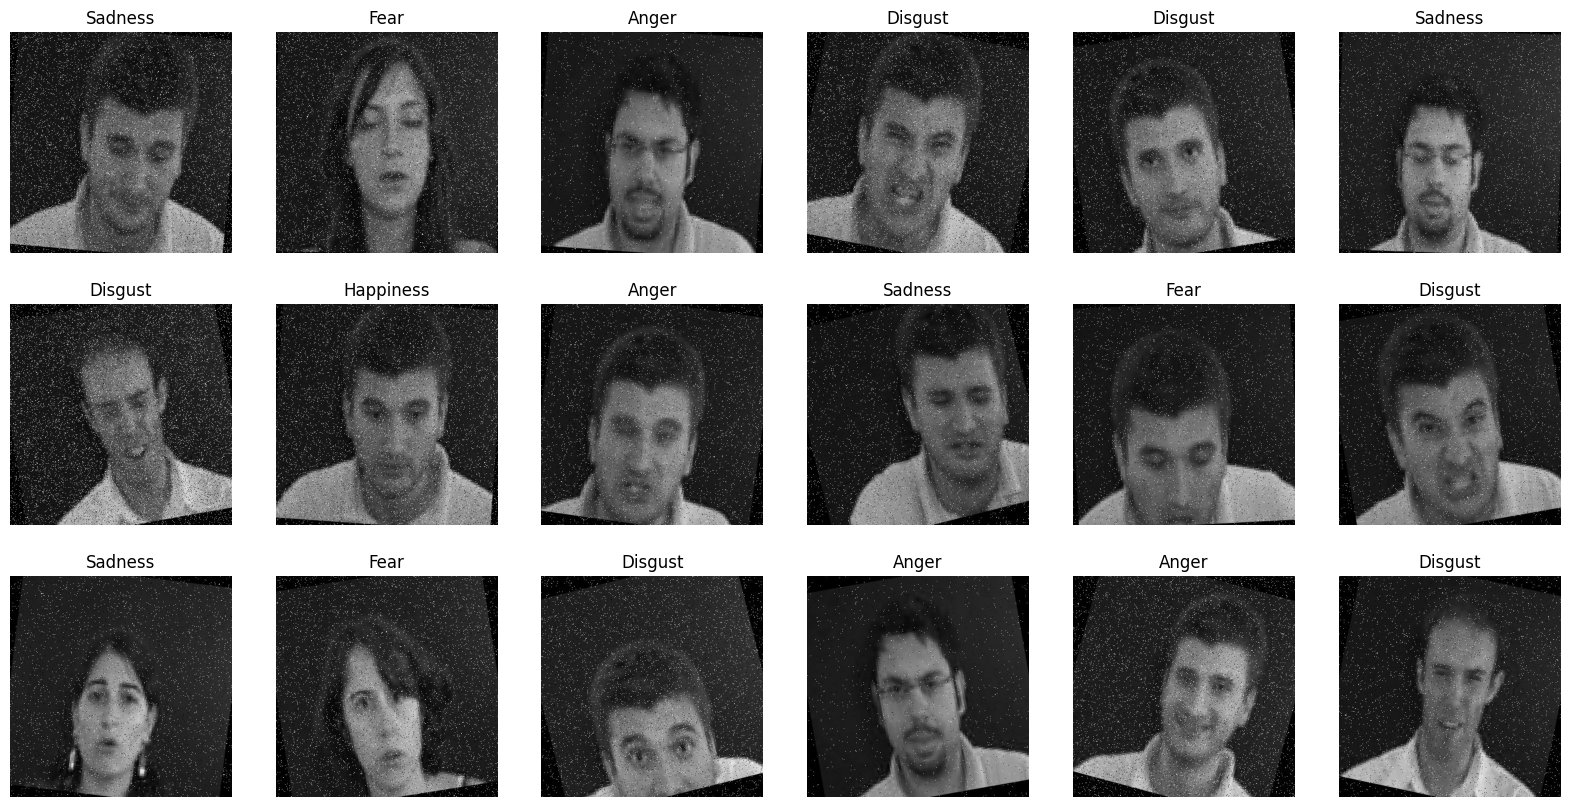

In [27]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/einterface-image-dataset/eINTERFACE_2021_Image/train", target_class=class_name)

In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 11475 images belonging to 6 classes.


In [29]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [32]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
180/180 [==============================] - 107s 594ms/step - loss: 1.7268 - accuracy: 0.2704 - val_loss: 1.6123 - val_accuracy: 0.3297
Epoch 2/50
180/180 [==============================] - 107s 596ms/step - loss: 1.5215 - accuracy: 0.3797 - val_loss: 1.4065 - val_accuracy: 0.4309
Epoch 3/50
180/180 [==============================] - 88s 488ms/step - loss: 1.3846 - accuracy: 0.4314 - val_loss: 1.2348 - val_accuracy: 0.5131
Epoch 4/50
180/180 [==============================] - 99s 553ms/step - loss: 1.2794 - accuracy: 0.4818 - val_loss: 1.2895 - val_accuracy: 0.5007
Epoch 5/50
180/180 [==============================] - 88s 489ms/step - loss: 1.1909 - accuracy: 0.5287 - val_loss: 1.0478 - val_accuracy: 0.5954
Epoch 6/50
180/180 [==============================] - 88s 491ms/step - loss: 1.1231 - accuracy: 0.5551 - val_loss: 1.1126 - val_accuracy: 0.5495
Epoch 7/50
180/180 [==============================] - 87s 484ms/step - loss: 1.0514 - accuracy: 0.5890 - val_loss: 1.0347 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
classifier.evaluate(test_set)

180/180 [==============================] - 25s 138ms/step - loss: 0.4056 - accuracy: 0.8448


[0.4056052267551422, 0.8447930216789246]

Text(0, 0.5, 'Loss')

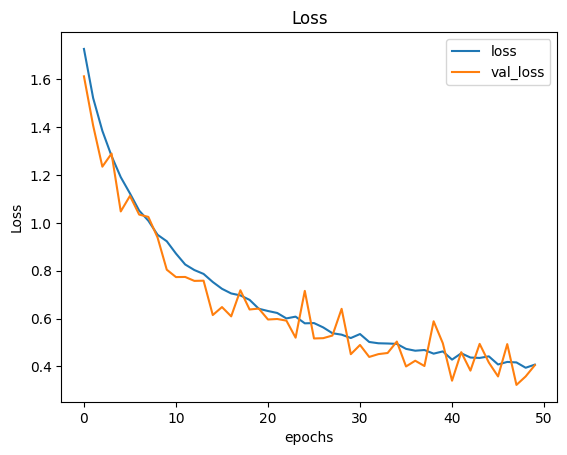

In [34]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

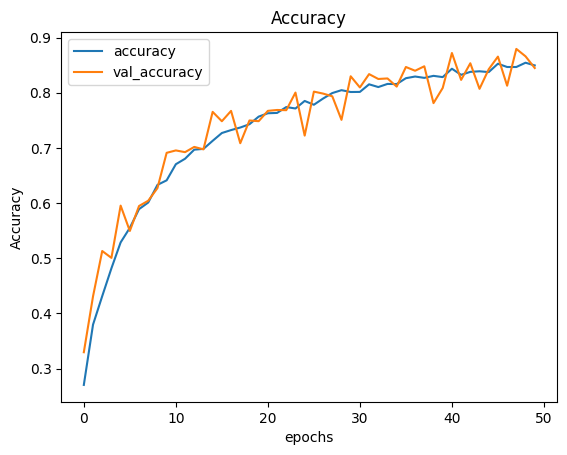

In [35]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

1/1 [==============================] - 0s 66ms/step


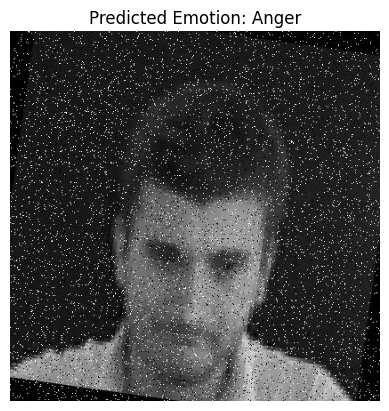

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from keras.models import load_model

# Load the pre-trained model
model_path = "model1.h5"
loaded_model = load_model(model_path)

# Load and preprocess the input image
image = cv2.imread("/content/einterface-image-dataset/eINTERFACE_2021_Image/test/Anger/myvideo_frames1145_jpg.rf.a70494c4a5408ae9136708ee55155fd9.jpg")

if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    resize_image = cv2.resize(image_rgb, (128, 128))    # Resize the image
    input_data = np.expand_dims(resize_image, axis=0)   # Add batch dimension
    input_data = input_data / 255.0                     # Normalize the image

    # Make prediction
    pred = loaded_model.predict(input_data)
    emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']
    predicted_emotion = emotion_labels[np.argmax(pred)]

    # Display the image along with the predicted emotion
    plt.imshow(image_rgb)
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()
else:
    print("Error: Unable to load the input image.")


In [41]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}